In [10]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model # sklearn is the ml modulle
from sklearn.metrics import r2_score # used to evalute the model

In [2]:
# To see plots in notebook, run the following command
%matplotlib inline

In [3]:
# read data from csv file
df=pd.read_csv('Fuel.csv')

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df.describe() # a summary of the data

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
# select columns to be used
selected_cols=['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']
df2=df[selected_cols] # 

Text(0, 0.5, 'CO2')

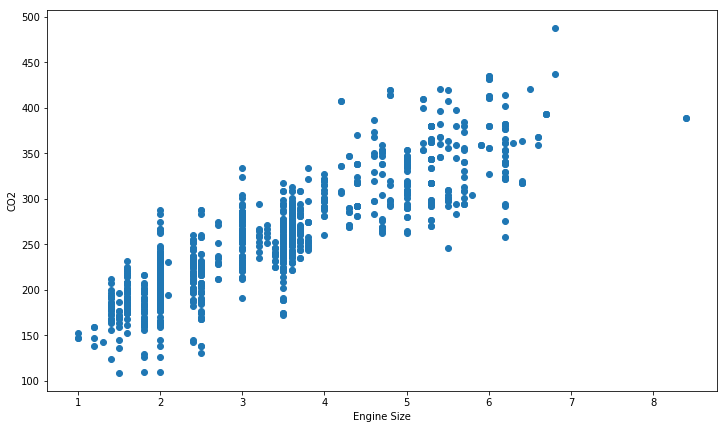

In [14]:
# plot the relationship between engine size and co2 emissions
plt.figure(figsize=(12,7)) # set the figure size
plt.scatter (df2['ENGINESIZE'],df2['CO2EMISSIONS'])
plt.xlabel('Engine Size')
plt.ylabel('CO2')

From the above figure, it is obvious to see that co2 emission is very positively related to engine size

Text(0, 0.5, 'co2')

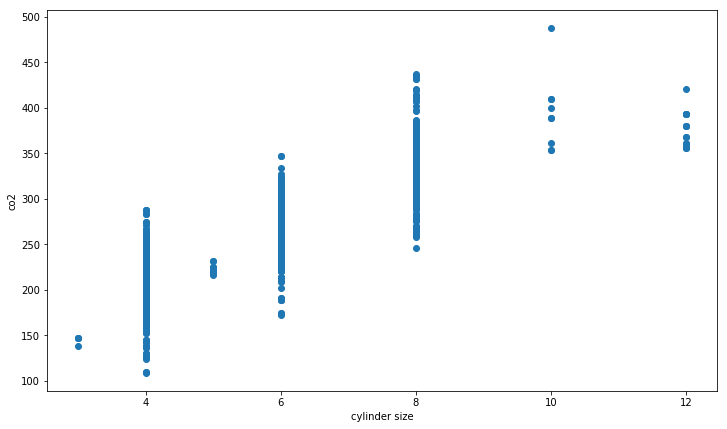

In [15]:
#plot the relatiohsip between cylinder and co2 emission
plt.figure(figsize=(12,7))
plt.scatter(df2['CYLINDERS'],df2['CO2EMISSIONS'])
plt.xlabel('cylinder size')
plt.ylabel('co2')

Cylinder size and co2 emissions are positively correlated too.

In [16]:
# divide data to training group and test group, 80% and 20% 
np.random.seed( 30 ) # set the seed, so every time get the same msk
msk=np.random.rand(len(df2))<0.8
train=df2[msk]
test=df2[~msk]

In [23]:
# linear regression model
linear=linear_model.LinearRegression()
train_x=np.array(train['ENGINESIZE']).reshape(-1,1)
train_y=np.array(train['CO2EMISSIONS']).reshape(-1,1)
linear.fit(train_x,train_y) # fit(x,y)
print('coef is {0}, intercept is {1}'.format(linear.coef_,linear.intercept_))

coef is [[38.91307263]], intercept is [125.08321748]


Text(0, 0.5, 'Emission')

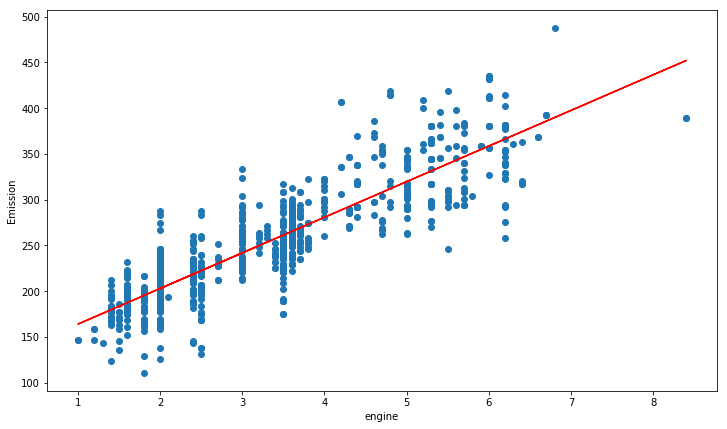

In [18]:
# plot predicted data and actual data in same figure
plt.figure(figsize=(12,7))
plt.scatter(train['ENGINESIZE'],train['CO2EMISSIONS'])
plt.plot(train_x,linear.coef_[0][0]*train_x + linear.intercept_[0],color='r')
plt.xlabel('engine')
plt.ylabel('Emission')

In [19]:
# test the value
test_x=np.array(test['ENGINESIZE']).reshape(-1,1)
test_y=np.array(test['CO2EMISSIONS'])
predict_y=linear.predict(test_x)

In [24]:
print('The mean of square error is {}'.format(np.mean((predict_y-test_y)**2)))
print('R2 is {}'.format(r2_score(test_y,predict_y))) # R2 the bigger the better

The mean of square error is 6741.786400299728
R2 is 0.7612005549013682


The model has a R-squared at 0.76